# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config_nyt import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [24]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

In [25]:
Cities_df = pd.DataFrame(cities)
Cities_df = Cities_df.rename(columns={0:"Cities"})
Cities_df['ID'] = ""
Cities_df['Cloudiness'] = ""
Cities_df['Country'] = ""
Cities_df['Date'] = ""
Cities_df['Humidity'] = ""
Cities_df['Lat'] = ""
Cities_df['Lng'] = ""
Cities_df['Max Temp'] = ""
Cities_df['Wind Speed'] = ""

Cities_df.head()

,Cities,ID,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,kapaa,,,,,,,,,
1,zhoucheng,,,,,,,,,
2,keflavik,,,,,,,,,
3,usvyaty,,,,,,,,,
4,shepsi,,,,,,,,,


In [26]:
#test query url

url = "http://api.openweathermap.org/data/2.5/weather?"
#city = "London"

query_url = url + "appid=" + api_key + "&q=" 
query_url


weather_response = requests.get(query_url)
weather_json = weather_response.json()
weather_json

{'cod': '400', 'message': 'Nothing to geocode'}

In [27]:


print("Beginning Data Retrieval")
print("--------------------------")

for index, row in Cities_df.iterrows():
    city = row['Cities']
    
    weather_response = requests.get(query_url + city).json()
    
    
    
    try:
        print(f"Retrieving Results for city ({index}): {city}")
        Cities_df.loc[index, 'Cities'] = weather_response['name']
        Cities_df.loc[index, 'ID'] = weather_response['id']
        Cities_df.loc[index, 'Cloudiness'] = weather_response['clouds']['all']
        Cities_df.loc[index, 'Country'] = weather_response['sys']['country']
        Cities_df.loc[index, 'Date'] = weather_response['dt']
        Cities_df.loc[index, 'Humidity'] = weather_response['main']['humidity']
        Cities_df.loc[index, 'Lat'] = weather_response['coord']['lat']
        Cities_df.loc[index, 'Lng'] = weather_response['coord']['lon']
        Cities_df.loc[index, 'Max Temp'] = weather_response['main']['temp_max']
        Cities_df.loc[index, 'Wind Speed'] = weather_response['wind']['speed']
        
    except (KeyError, IndexError):
        print("City not found. Skipping....")
        
print("---------------")
print("Data Retrieval Complete")
print("-------")


Beginning Data Retrieval
--------------------------
Retrieving Results for city (0): kapaa
Retrieving Results for city (1): zhoucheng
Retrieving Results for city (2): keflavik
Retrieving Results for city (3): usvyaty
Retrieving Results for city (4): shepsi
Retrieving Results for city (5): oranjemund
Retrieving Results for city (6): hilo
Retrieving Results for city (7): provideniya
Retrieving Results for city (8): east london
Retrieving Results for city (9): samusu
City not found. Skipping....
Retrieving Results for city (10): pandavapura
Retrieving Results for city (11): mataura
Retrieving Results for city (12): grand centre
City not found. Skipping....
Retrieving Results for city (13): dikson
Retrieving Results for city (14): barrow
Retrieving Results for city (15): hobart
Retrieving Results for city (16): pisco
Retrieving Results for city (17): vadso
Retrieving Results for city (18): kodiak
Retrieving Results for city (19): kirakira
Retrieving Results for city (20): havoysund
Retriev

Retrieving Results for city (176): te anau
Retrieving Results for city (177): la romana
Retrieving Results for city (178): hasaki
Retrieving Results for city (179): yar-sale
Retrieving Results for city (180): ulaangom
Retrieving Results for city (181): samarai
Retrieving Results for city (182): cherskiy
Retrieving Results for city (183): victoria
Retrieving Results for city (184): gat
Retrieving Results for city (185): marawi
Retrieving Results for city (186): saint-pierre
Retrieving Results for city (187): batticaloa
Retrieving Results for city (188): qaanaaq
Retrieving Results for city (189): hamilton
Retrieving Results for city (190): algarrobo
Retrieving Results for city (191): stornoway
City not found. Skipping....
Retrieving Results for city (192): roebourne
Retrieving Results for city (193): moree
Retrieving Results for city (194): krasnyy chikoy
Retrieving Results for city (195): port hardy
Retrieving Results for city (196): lolua
City not found. Skipping....
Retrieving Results

Retrieving Results for city (352): kondoa
Retrieving Results for city (353): asau
City not found. Skipping....
Retrieving Results for city (354): manta
Retrieving Results for city (355): kokstad
Retrieving Results for city (356): rawson
Retrieving Results for city (357): maniwaki
Retrieving Results for city (358): beira
Retrieving Results for city (359): quatre cocos
Retrieving Results for city (360): sitka
Retrieving Results for city (361): beyneu
Retrieving Results for city (362): mersing
Retrieving Results for city (363): atyra
Retrieving Results for city (364): alphen
Retrieving Results for city (365): verkhnyaya inta
Retrieving Results for city (366): puerto escondido
Retrieving Results for city (367): pontianak
Retrieving Results for city (368): meulaboh
Retrieving Results for city (369): nuevo progreso
Retrieving Results for city (370): thiers
Retrieving Results for city (371): kanie
Retrieving Results for city (372): rafai
Retrieving Results for city (373): grand river south ea

Retrieving Results for city (523): basoko
Retrieving Results for city (524): najran
Retrieving Results for city (525): adrar
Retrieving Results for city (526): villa carlos paz
Retrieving Results for city (527): akdepe
Retrieving Results for city (528): moose factory
Retrieving Results for city (529): ruatoria
City not found. Skipping....
Retrieving Results for city (530): warqla
City not found. Skipping....
Retrieving Results for city (531): rungata
City not found. Skipping....
Retrieving Results for city (532): ceres
Retrieving Results for city (533): asayita
City not found. Skipping....
Retrieving Results for city (534): rabo de peixe
Retrieving Results for city (535): mossendjo
Retrieving Results for city (536): kalinin
Retrieving Results for city (537): mys shmidta
City not found. Skipping....
Retrieving Results for city (538): gillette
Retrieving Results for city (539): juneau
Retrieving Results for city (540): codrington
Retrieving Results for city (541): kochubey
Retrieving Res

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#example

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | bisignano
Processing Record 4 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | ashland
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | port macquarie
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | busselton
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [29]:
Cities_df


,Cities,ID,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Kapaa,5848280,40,US,1567643533,59,22.08,-159.32,305.15,6.7
1,Zhoucheng,6957977,90,CN,1567643643,94,31.35,119.33,297.15,2
2,Keflavik,3415496,90,IS,1567643643,100,64,-22.56,283.15,5.7
3,Usvyaty,477774,3,RU,1567643643,91,55.75,30.75,282.656,1.17
4,Shepsi,494846,0,RU,1567643644,73,44.04,39.15,296.656,4.44
5,Oranjemund,3354071,55,ZA,1567643644,89,-28.55,16.43,286.356,8.76
6,Hilo,5855927,90,US,1567643229,83,19.71,-155.08,301.48,4.6
7,Provideniya,4031574,75,RU,1567643540,76,64.42,-173.23,284.15,3
8,East London,1006984,100,ZA,1567643565,92,-33.02,27.91,286.356,2.43
9,samusu,,,,,,,,,


City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


In [35]:
Cities_df['ID'].replace('', np.nan, inplace=True)
Cities_df.head()

Cities_df.dropna(subset=['ID'], inplace=True)
Cities_df.reset_index()


,index,Cities,ID,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,Kapaa,5848280.0,40,US,1567643533,59,22.08,-159.32,305.15,6.7
1,1,Zhoucheng,6957977.0,90,CN,1567643643,94,31.35,119.33,297.15,2
2,2,Keflavik,3415496.0,90,IS,1567643643,100,64,-22.56,283.15,5.7
3,3,Usvyaty,477774.0,3,RU,1567643643,91,55.75,30.75,282.656,1.17
4,4,Shepsi,494846.0,0,RU,1567643644,73,44.04,39.15,296.656,4.44
5,5,Oranjemund,3354071.0,55,ZA,1567643644,89,-28.55,16.43,286.356,8.76
6,6,Hilo,5855927.0,90,US,1567643229,83,19.71,-155.08,301.48,4.6
7,7,Provideniya,4031574.0,75,RU,1567643540,76,64.42,-173.23,284.15,3
8,8,East London,1006984.0,100,ZA,1567643565,92,-33.02,27.91,286.356,2.43
9,10,Pandavapura,1260553.0,100,IN,1567643645,86,12.5,76.67,294.456,5.25


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

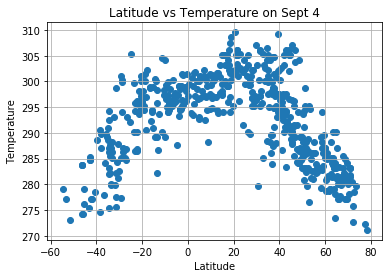

In [37]:
# Build a scatter plot for each data type
plt.scatter(Cities_df["Lat"], Cities_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Temperature on Sept 4")
plt.ylabel("Temperature")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatvTempplot.png")

Cities_df.to_csv("Cityweatherdata.csv", index=False, header=True)

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

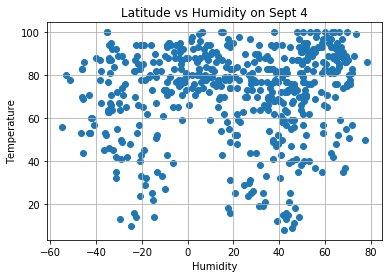

In [38]:
# Build a scatter plot for each data type
plt.scatter(Cities_df["Lat"], Cities_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Humidity on Sept 4")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatvHumidplot.png")



# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

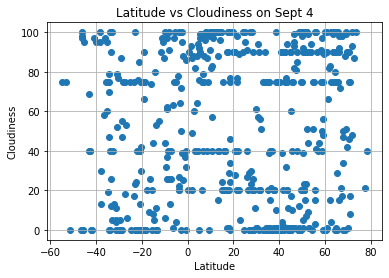

In [40]:
# Build a scatter plot for each data type
plt.scatter(Cities_df["Lat"], Cities_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Cloudiness on Sept 4")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatvCloudinessplot.png")



# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

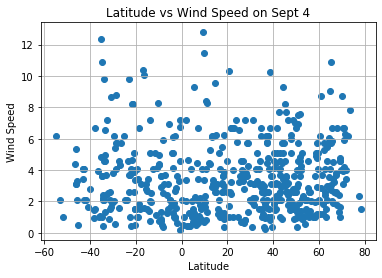

In [39]:
# Build a scatter plot for each data type
plt.scatter(Cities_df["Lat"], Cities_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Wind Speed on Sept 4")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatvWindspeedplot.png")



# Show plot
plt.show()

Trend 1: There is no correlation between cloudiness and latitude.
Trend 2: There is higher temperatures around the equator.
Trend 3: There a grouping of dry climates just outside the topic zone.